In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
%reload_ext autoreload

In [32]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import funcs
import pandas as pd
import matplotlib as plt

from sklearn.preprocessing import MinMaxScaler
import foressment_ai as foras

# Condition Monitoring Dataset (AI4I 2021)

## Load data
https://www.kaggle.com/datasets/stephanmatzka/condition-monitoring-dataset-ai4i-2021 

In [6]:
data_names = []
for filename in os.listdir('../datasets/AI4I2021_TimeSeries'):
    data_names.append(filename)
data_names

['01_off_hrm.csv',
 '01_off_raw.csv',
 '02_on_hrm.csv',
 '02_on_raw.csv',
 '03_cap_hrm.csv',
 '03_cap_raw.csv',
 '04_out_hrm.csv',
 '04_out_raw.csv',
 '05_unb_hrm.csv',
 '05_unb_raw.csv',
 '06_c25_hrm.csv',
 '06_c25_raw.csv',
 '07_c75_hrm.csv',
 '07_c75_raw.csv',
 '08_vnt_hrm.csv',
 '08_vnt_raw.csv']

In [7]:
datasets = {}
times = {}
for data_name in data_names:
    data = pd.read_csv(f'../datasets/AI4I2021_TimeSeries/{data_name}')
    times[data_name] = data['Time']
    del data['Time']
    datasets[data_name] = data

In [8]:
datasets[data_names[0]].head()

,accX,accY,accZ
0,-10.736000,-14.884000,958.310000
1,-9.699596,-13.892806,967.710033
2,-7.844397,-14.902526,957.201521
3,-11.590000,-13.176000,963.068000
4,-8.885465,-14.772226,958.522741


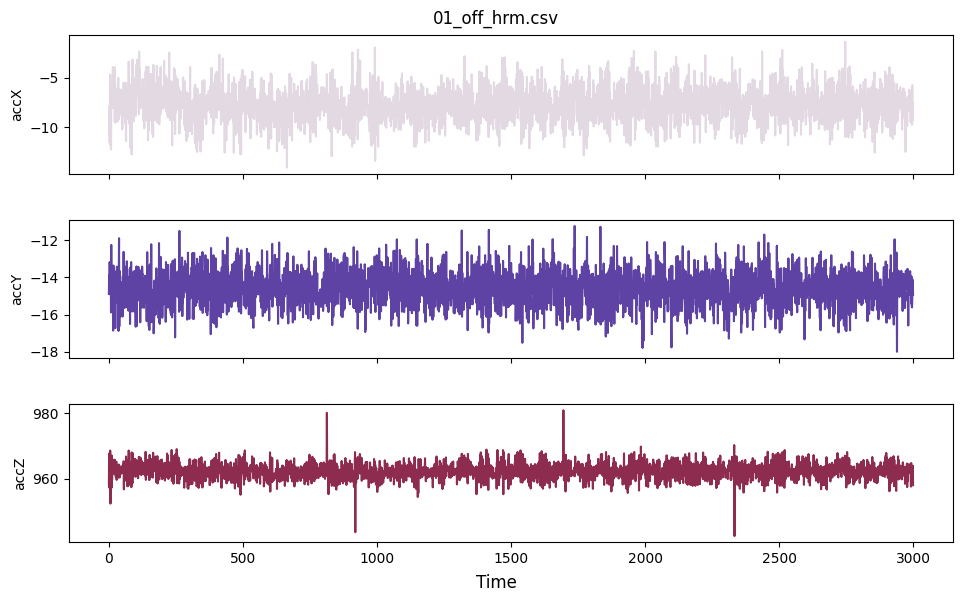

In [9]:
funcs.draw_features(datasets[data_names[0]], draw_points=datasets[data_names[0]].shape[0], title=data_names[0])

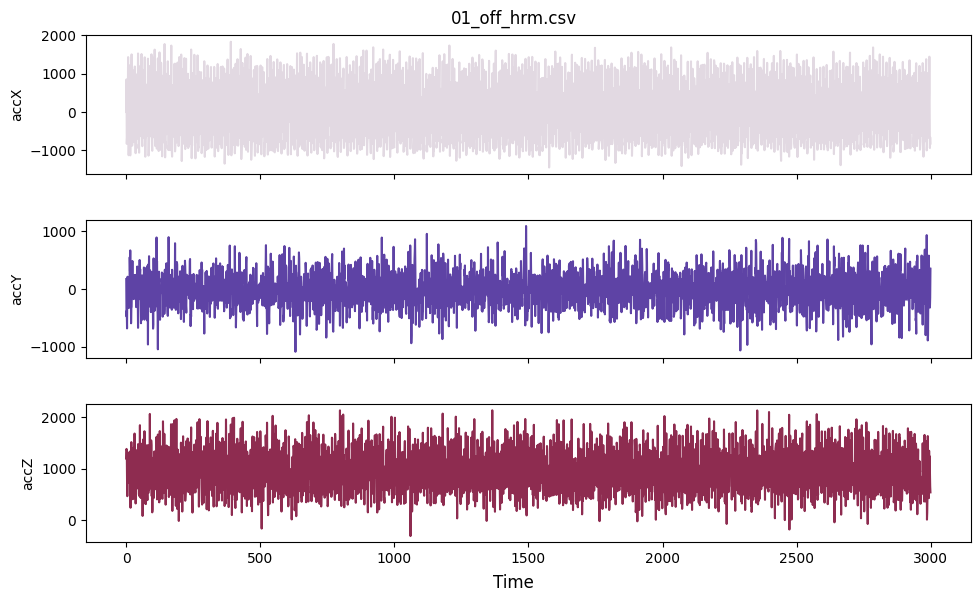

In [60]:
funcs.draw_features(datasets['05_unb_hrm.csv'], draw_points=datasets[data_names[0]].shape[0], title=data_names[0])

## Split data into samples

In [10]:
split_proportion = {'train': 0.7, 'validation': 0.1, 'test': 0.2}

In [11]:
train_data = {}
valid_data = {}
test_data = {}

In [12]:
for data_name, dataset in datasets.items():
    train_data[data_name] = dataset.values[:round(split_proportion['train'] * dataset.shape[0]), :]
    valid_data[data_name] = dataset.values[round(split_proportion['train'] * dataset.shape[0]):round(
        (split_proportion['train'] + split_proportion['validation']) * dataset.shape[0]), :]
    test_data[data_name] = dataset.values[-round(split_proportion['test'] * dataset.shape[0]):, :]
    print(
        f'{data_name}: {train_data[data_name].shape[0]}/{valid_data[data_name].shape[0]}/{test_data[data_name].shape[0]}')

01_off_hrm.csv: 2100/300/600
01_off_raw.csv: 3360/480/960
02_on_hrm.csv: 2100/300/600
02_on_raw.csv: 3004/429/858
03_cap_hrm.csv: 2100/300/600
03_cap_raw.csv: 2992/428/855
04_out_hrm.csv: 2100/300/600
04_out_raw.csv: 3114/444/890
05_unb_hrm.csv: 2100/300/600
05_unb_raw.csv: 3002/428/858
06_c25_hrm.csv: 2100/300/600
06_c25_raw.csv: 3009/429/860
07_c75_hrm.csv: 2100/300/600
07_c75_raw.csv: 3010/430/860
08_vnt_hrm.csv: 2100/300/600
08_vnt_raw.csv: 2981/425/852


## Normalization

In [13]:
for data_name in data_names:
    scaler = MinMaxScaler()
    scaler.fit(train_data[data_name])
    train_data[data_name] = scaler.transform(train_data[data_name])
    valid_data[data_name] = scaler.transform(valid_data[data_name])
    test_data[data_name] = scaler.transform(test_data[data_name])

# Create time series generators

In [14]:
params = foras.ForecasterParameters(n_features=3,
                              look_back_length=50,
                              horizon=5)

In [15]:
train_ts = {}
valid_ts = {}
test_ts = {}

In [16]:
for data_name in data_names:
    train_ts[data_name] = foras.TSGenerator(train_data[data_name],
                                      look_back_length=params.look_back_length,
                                      horizon=params.horizon)
    valid_ts[data_name] = foras.TSGenerator(valid_data[data_name],
                                      look_back_length=params.look_back_length,
                                      horizon=params.horizon)
    test_ts[data_name] = foras.TSGenerator(test_data[data_name],
                                     look_back_length=params.look_back_length,
                                     horizon=params.horizon)
    print(
        f'{data_name}: data = {train_ts[data_name].data.shape[0]}/{valid_ts[data_name].data.shape[0]}/{test_ts[data_name].data.shape[0]} \n'
        f'                targets - {train_ts[data_name].targets.shape[0]}/{valid_ts[data_name].targets.shape[0]}/{test_ts[data_name].targets.shape[0]}')

01_off_hrm.csv: data = 2046/246/546 
                targets - 2046/246/546
01_off_raw.csv: data = 3306/426/906 
                targets - 3306/426/906
02_on_hrm.csv: data = 2046/246/546 
                targets - 2046/246/546
02_on_raw.csv: data = 2950/375/804 
                targets - 2950/375/804
03_cap_hrm.csv: data = 2046/246/546 
                targets - 2046/246/546
03_cap_raw.csv: data = 2938/374/801 
                targets - 2938/374/801
04_out_hrm.csv: data = 2046/246/546 
                targets - 2046/246/546
04_out_raw.csv: data = 3060/390/836 
                targets - 3060/390/836
05_unb_hrm.csv: data = 2046/246/546 
                targets - 2046/246/546
05_unb_raw.csv: data = 2948/374/804 
                targets - 2948/374/804
06_c25_hrm.csv: data = 2046/246/546 
                targets - 2046/246/546
06_c25_raw.csv: data = 2955/375/806 
                targets - 2955/375/806
07_c75_hrm.csv: data = 2046/246/546 
                targets - 2046/246/546
07_c75_raw.csv

# Create model and hyperparameters optimization

In [17]:
model_params = foras.DeepForecasterParameters(n_features=params.n_features,
                                        look_back_length=params.look_back_length,
                                        horizon=params.horizon,
                                        block_type='LSTM',
                                        units=[64],
                                        dropout=0.001,
                                        hidden_activation='relu',
                                        output_activation='linear')

Find the best model for each dataset.

In [18]:
best_models = {}

In [33]:
for data_name in data_names:
    print(f'Dataset: {data_name}')
    # Create tuner.
    tuner = foras.DeepForecasterTuner(model_params)
    # Set model hyperparameters for tuning.
    tuner.set_tuned_hps(block_type=['LSTM', 'GRU'],
                    n_rec_layers=[1, 2],
                    units=[[64, 32], [24, 16]],
                    dropout=[0.0, 0.001, 0.01],
                    hidden_activation=['tanh', 'relu'],
                    output_activation=['linear', 'sigmoid'])
    # Find best models.
    best_models[data_name] = (
        tuner.find_best_models(train_ts[data_name].get_data(),
                               train_ts[data_name].get_targets(),
                               validation_data=(
                                   valid_ts[data_name].get_data(),
                                   valid_ts[data_name].get_targets()),
                               tuner_type='BayesianOptimization',
                               max_trials=5,
                               epochs=50,
                               n_models=1,
                               batch_size=32,
                               patience=3))

Trial 5 Complete [00h 01m 21s]
val_loss: 0.010072769597172737

Best val_loss So Far: 0.009716719388961792
Total elapsed time: 00h 06m 57s
Results summary
Showing 1 best trials

Trial 1 summary
Hyperparameters:
units_0: 32
n_rec_layers: 1
block_type: LSTM
dropout: 0.0
hidden_activation: tanh
output_activation: sigmoid
Score: 0.009716719388961792

Parameters for model 0: {'units_0': 32, 'n_rec_layers': 1, 'block_type': 'LSTM', 'dropout': 0.0, 'hidden_activation': 'tanh', 'output_activation': 'sigmoid'}


In [62]:
for data_name in data_names:
    model = best_models[data_name][0]
    print(model.default_name, ':', model.model_params.to_dict(), '\n')

lstm_64_24_d0001 : {'n_features': 3, 'look_back_length': 50, 'horizon': 5, 'units': {'units_0': 64, 'units_1': 24}, 'n_rec_layers': 2, 'block_type': 'LSTM', 'dropout': 0.001, 'hidden_activation': 'relu', 'output_activation': 'sigmoid', 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x0000015758031590>, 'loss': 'mse'} 

gru_64_16_d0001 : {'n_features': 3, 'look_back_length': 50, 'horizon': 5, 'units': {'units_0': 64, 'units_1': 16}, 'n_rec_layers': 2, 'block_type': 'GRU', 'dropout': 0.001, 'hidden_activation': 'relu', 'output_activation': 'sigmoid', 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x0000015758031590>, 'loss': 'mse'} 

lstm_32_24_d00 : {'n_features': 3, 'look_back_length': 50, 'horizon': 5, 'units': {'units_0': 32, 'units_1': 24}, 'n_rec_layers': 2, 'block_type': 'LSTM', 'dropout': 0.0, 'hidden_activation': 'tanh', 'output_activation': 'linear', 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x0000015758031590>, 'loss': 'mse'} 


# Train deep forecasting models

In [35]:
model_directory = 'ai_models/forecastate/ready'
histories = {}

In [36]:
for data_name, model in best_models.items():
    model = model[0]
    print(data_name, model.default_name)
    # Train model
    model.train(train_ts[data_name].get_data(), train_ts[data_name].get_targets(),
                validation_data=(valid_ts[data_name].get_data(), valid_ts[data_name].get_targets()),
                batch_size=32, n_epochs=100, early_stop_patience=5)
    # Get train history
    histories[f'{data_name}/{model.default_name}'] = model.history
    # Save trained model
    model_filename = f'{model_directory}/{data_name.lower()}_{model.default_name}.keras'
    model.save_model(model_filename)
    print(f'Model save to', model_filename)

01_off_hrm.csv lstm_64_24_d0001
Epoch 1/100
64/64 [==============================] - 4s 35ms/step - loss: 0.0154 - val_loss: 0.0157
Epoch 2/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 3/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 4/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 5/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 6/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 7/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 8/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 9/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 10/100
64/64 [==============================] - 2s 28ms/step -

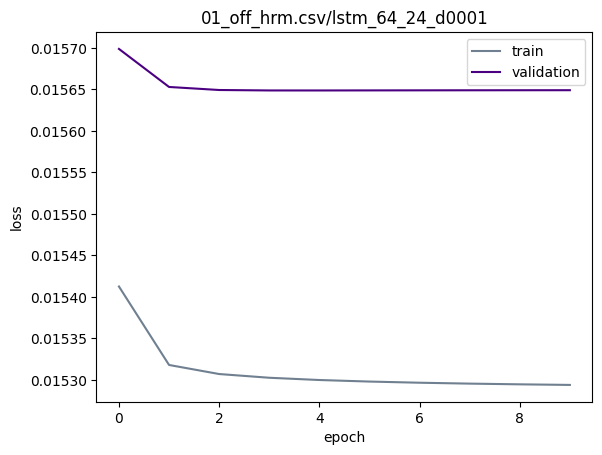

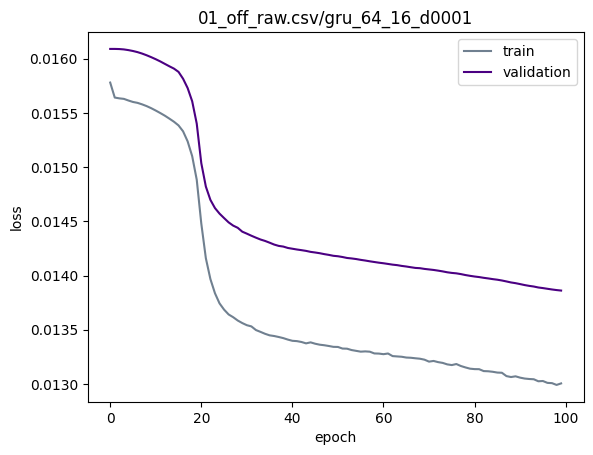

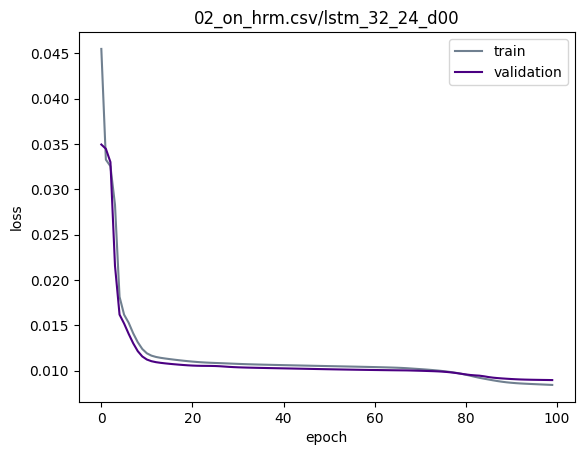

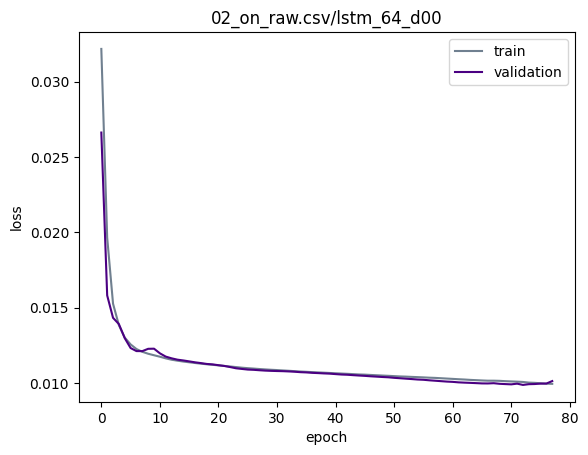

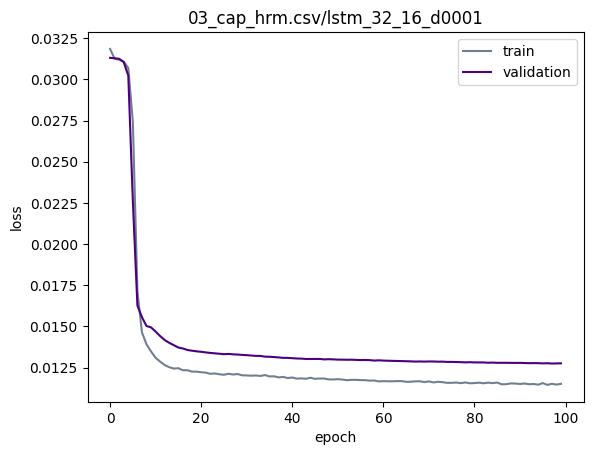

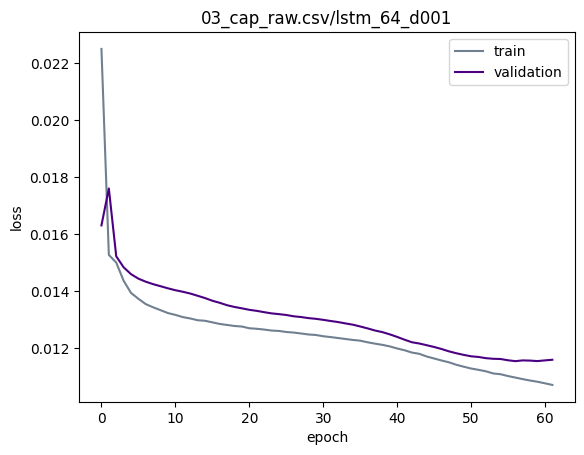

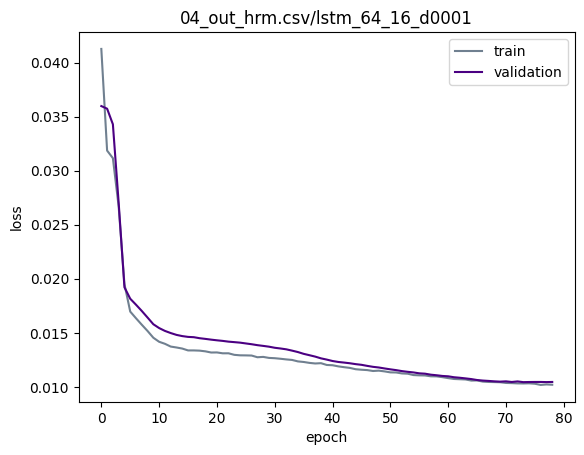

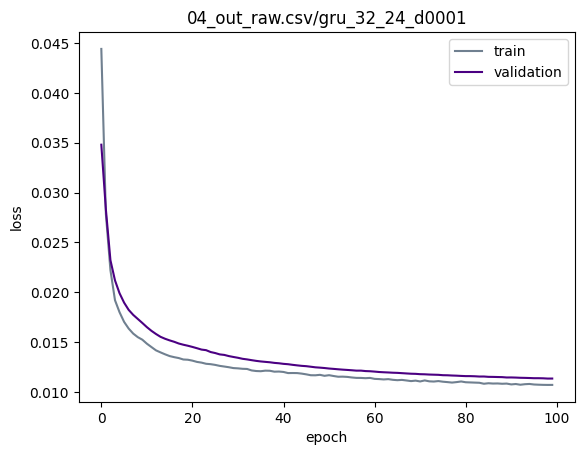

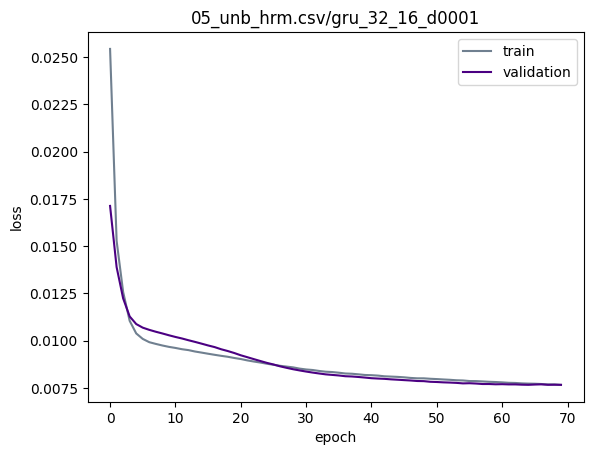

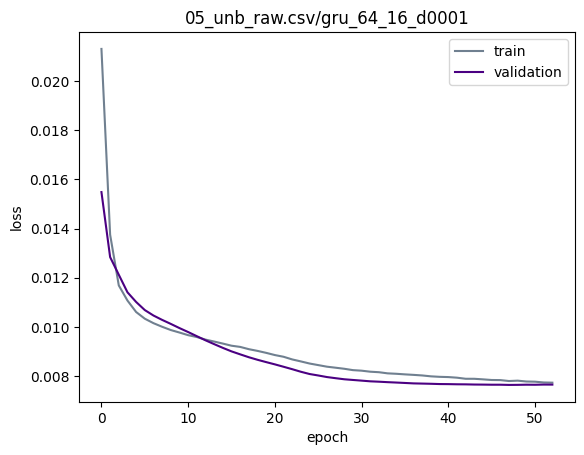

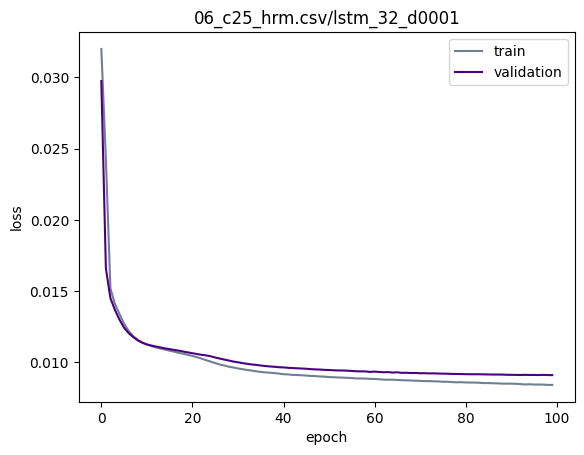

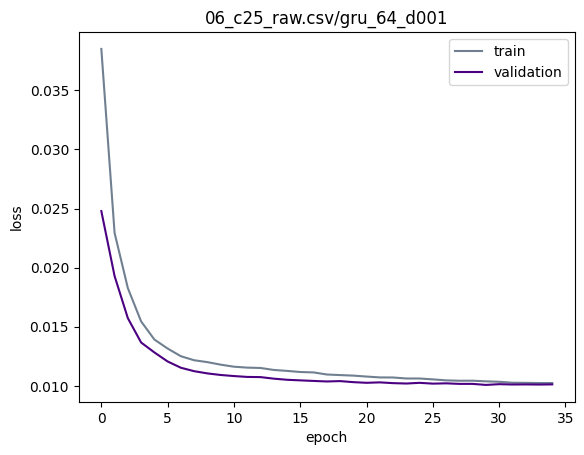

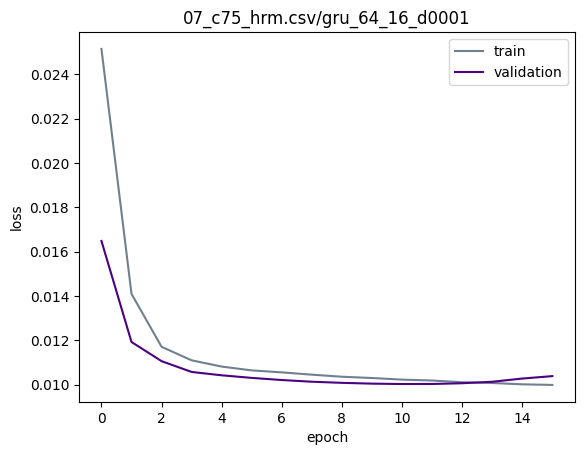

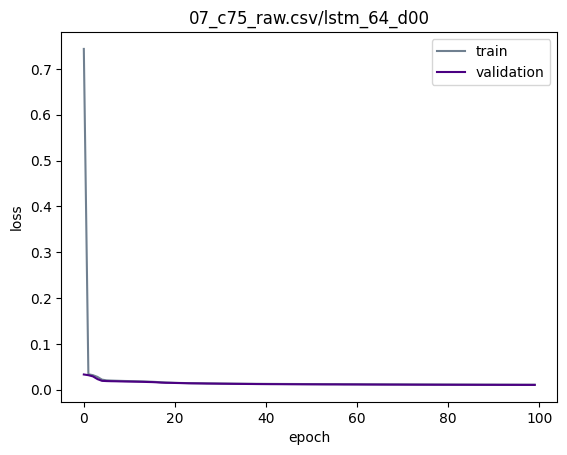

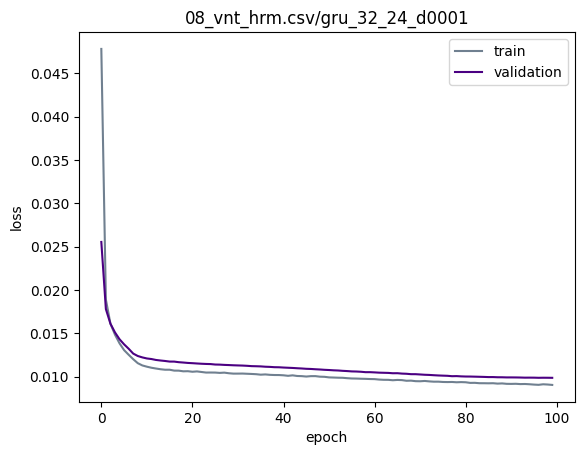

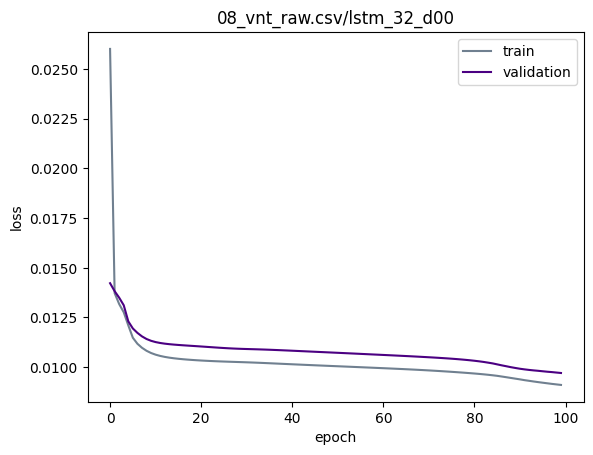

In [37]:
for name, model_history in histories.items():
    plt.plot(model_history.history['loss'], color='slategrey')
    plt.plot(model_history.history['val_loss'], color='indigo')
    plt.title(name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

# Evaluation

In [38]:
features_names = list(datasets[data_names[0]].columns)
features_names

['accX', 'accY', 'accZ']

In [39]:
estimators = {}

In [40]:
for data_name in data_names:
    estimators[data_name] = foras.ForecastEstimator(features_names=features_names)
    estimators[data_name].set_true_values(test_ts[data_name].get_targets())

In [41]:
forecasting_data_length = params.horizon

## Deep forecasting

In [42]:
for name in histories.keys():
    data_name = name.split('/')[0]
    model_name = name.split('/')[1]
    print(data_name, model_name)
    current_batch = test_ts[data_name].get_data()
    print('Data for forecasting:', current_batch.shape)
    model_filename = f'{model_directory}/{data_name.lower()}_{model_name}.keras'
    model = foras.DeepForecaster(from_file=model_filename)
    pred = model.forecasting(current_batch,
                             forecasting_data_length=forecasting_data_length)
    estimators[data_name].set_pred_values(pred, model_name=model.default_name)

01_off_hrm.csv lstm_64_24_d0001
Data for forecasting: (546, 50, 3)
55/55 [==============================] - 1s 7ms/step
01_off_raw.csv gru_64_16_d0001
Data for forecasting: (906, 50, 3)
91/91 [==============================] - 1s 7ms/step
02_on_hrm.csv lstm_32_24_d00
Data for forecasting: (546, 50, 3)
55/55 [==============================] - 4s 7ms/step
02_on_raw.csv lstm_64_d00
Data for forecasting: (804, 50, 3)
81/81 [==============================] - 1s 4ms/step
03_cap_hrm.csv lstm_32_16_d0001
Data for forecasting: (546, 50, 3)
55/55 [==============================] - 1s 6ms/step
03_cap_raw.csv lstm_64_d001
Data for forecasting: (801, 50, 3)
81/81 [==============================] - 1s 4ms/step
04_out_hrm.csv lstm_64_16_d0001
Data for forecasting: (546, 50, 3)
55/55 [==============================] - 1s 7ms/step
04_out_raw.csv gru_32_24_d0001
Data for forecasting: (836, 50, 3)
84/84 [==============================] - 1s 7ms/step
05_unb_hrm.csv gru_32_16_d0001
Data for forecasting: (5

## Naive method

In [43]:
for name in histories.keys():
    data_name = name.split('/')[0]
    model_name = name.split('/')[1]
    print(data_name, model_name)
    current_batch = test_ts[data_name].get_data()
    print('Data for forecasting:', current_batch.shape)
    nm = foras.NaiveForecaster(model_params)
    estimators[data_name].set_pred_values(nm.forecasting(current_batch,
                                                         forecasting_data_length=forecasting_data_length),
                                          model_name='naive')

01_off_hrm.csv lstm_64_24_d0001
Data for forecasting: (546, 50, 3)
Forecasting: 100%|██████████| 546/546 [00:00<00:00, 49622.75it/s]
01_off_raw.csv gru_64_16_d0001
Data for forecasting: (906, 50, 3)
Forecasting: 100%|██████████| 906/906 [00:00<00:00, 85359.62it/s]
02_on_hrm.csv lstm_32_24_d00
Data for forecasting: (546, 50, 3)
Forecasting: 100%|██████████| 546/546 [00:00<00:00, 64395.30it/s]
02_on_raw.csv lstm_64_d00
Data for forecasting: (804, 50, 3)
Forecasting: 100%|██████████| 804/804 [00:00<00:00, 49995.11it/s]
03_cap_hrm.csv lstm_32_16_d0001
Data for forecasting: (546, 50, 3)
Forecasting: 100%|██████████| 546/546 [00:00<00:00, 82830.22it/s]
03_cap_raw.csv lstm_64_d001
Data for forecasting: (801, 50, 3)
Forecasting: 100%|██████████| 801/801 [00:00<00:00, 93669.32it/s]
04_out_hrm.csv lstm_64_16_d0001
Data for forecasting: (546, 50, 3)
Forecasting: 100%|██████████| 546/546 [00:00<00:00, 55140.37it/s]
04_out_raw.csv gru_32_24_d0001
Data for forecasting: (836, 50, 3)
Forecasting: 100%

## Evaluation

In [44]:
qualities = {}

In [45]:
for data_name in data_names:
    estimators[data_name].estimate()
    qualities[data_name] = estimators[data_name].quality

In [50]:
result = pd.DataFrame(index=data_names,
                      columns=['model_name', 'model_MSE', 'model_MAE', 'model_RMSE', 'naive_MSE',
                               'naive_MAE', 'naive_RMSE', ])

In [51]:
for data_name, quality in qualities.items():
    model_name = str(quality.columns[0]).replace('_MSE', '')
    result.loc[data_name, 'model_name'] = model_name
    result.loc[data_name, 'model_MSE'] = qualities[data_name].loc['ALL_FEATURES', f'{model_name}_MSE']
    result.loc[data_name, 'model_MAE'] = qualities[data_name].loc['ALL_FEATURES', f'{model_name}_MAE']
    result.loc[data_name, 'model_RMSE'] = qualities[data_name].loc['ALL_FEATURES', f'{model_name}_RMSE']
    result.loc[data_name, 'naive_MSE'] = qualities[data_name].loc['ALL_FEATURES', 'naive_MSE']
    result.loc[data_name, 'naive_MAE'] = qualities[data_name].loc['ALL_FEATURES', 'naive_MAE']
    result.loc[data_name, 'naive_RMSE'] = qualities[data_name].loc['ALL_FEATURES', 'naive_RMSE']
result

,model_name,model_MSE,model_MAE,model_RMSE,naive_MSE,naive_MAE,naive_RMSE
01_off_hrm.csv,lstm_64_24_d0001,0.013855,0.088286,0.111999,0.028,0.125673,0.159236
01_off_raw.csv,gru_64_16_d0001,0.013174,0.08347,0.105012,0.030394,0.125167,0.15969
02_on_hrm.csv,lstm_32_24_d0,0.00903,0.072718,0.093272,0.079231,0.219515,0.270435
02_on_raw.csv,lstm_64_d0,0.010796,0.079319,0.102411,0.078326,0.215285,0.266055
03_cap_hrm.csv,lstm_32_16_d0001,0.013786,0.089463,0.114305,0.074215,0.215166,0.265036
03_cap_raw.csv,lstm_64_d001,0.013625,0.087715,0.114337,0.077916,0.216776,0.269198
04_out_hrm.csv,lstm_64_16_d0001,0.010787,0.079761,0.10144,0.082206,0.226838,0.277095
04_out_raw.csv,gru_32_24_d0001,0.011604,0.083304,0.106974,0.077777,0.215475,0.267115
05_unb_hrm.csv,gru_32_16_d0001,0.008605,0.070315,0.090311,0.079496,0.227615,0.278266
05_unb_raw.csv,gru_64_16_d0001,0.008809,0.071262,0.092214,0.076489,0.219378,0.270236


In [52]:
result.sort_values(by='model_MSE')

,model_name,model_MSE,model_MAE,model_RMSE,naive_MSE,naive_MAE,naive_RMSE
05_unb_hrm.csv,gru_32_16_d0001,0.008605,0.070315,0.090311,0.079496,0.227615,0.278266
05_unb_raw.csv,gru_64_16_d0001,0.008809,0.071262,0.092214,0.076489,0.219378,0.270236
02_on_hrm.csv,lstm_32_24_d0,0.00903,0.072718,0.093272,0.079231,0.219515,0.270435
06_c25_hrm.csv,lstm_32_d0001,0.00932,0.072532,0.093621,0.077505,0.220724,0.271343
08_vnt_raw.csv,lstm_32_d0,0.009712,0.073399,0.095698,0.092527,0.242368,0.296576
08_vnt_hrm.csv,gru_32_24_d0001,0.009807,0.073225,0.094087,0.092509,0.245504,0.298714
06_c25_raw.csv,gru_64_d001,0.010344,0.077454,0.099897,0.075045,0.213965,0.265535
07_c75_hrm.csv,gru_64_16_d0001,0.010584,0.078693,0.101127,0.075857,0.217789,0.267254
07_c75_raw.csv,lstm_64_d0,0.010611,0.079354,0.101902,0.072605,0.206326,0.255618
04_out_hrm.csv,lstm_64_16_d0001,0.010787,0.079761,0.10144,0.082206,0.226838,0.277095


Show predictions with the best quality.

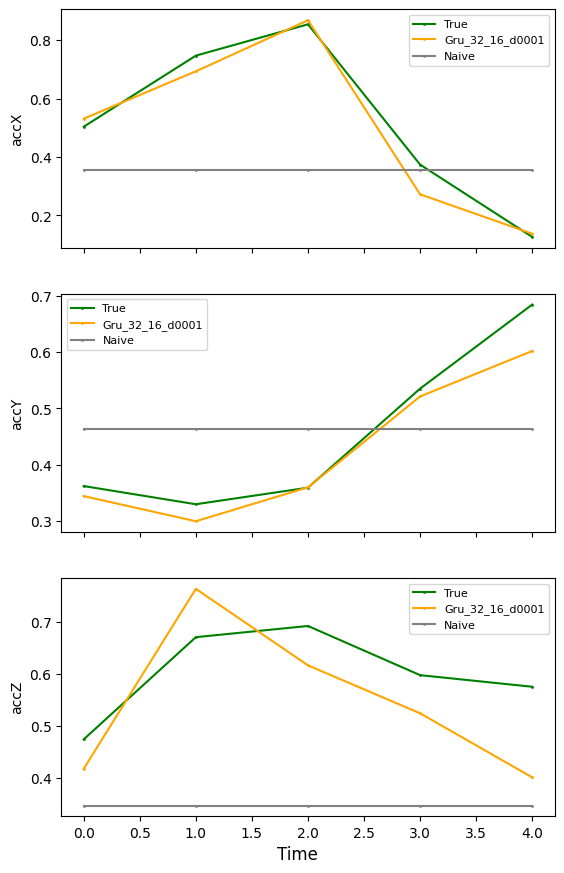

In [53]:
estimators['05_unb_hrm.csv'].draw(size=1)

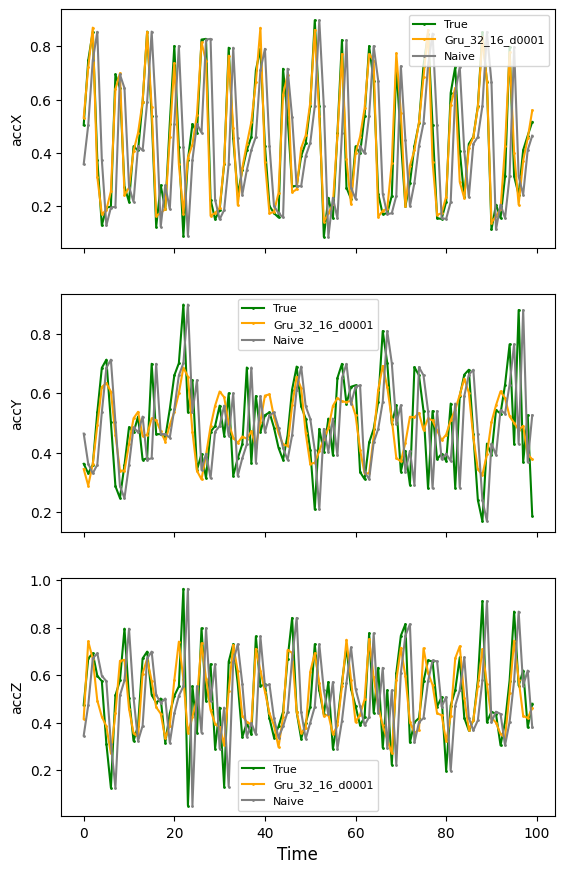

In [55]:
estimators['05_unb_hrm.csv'].draw(size=100, draw_horizon=1)

Show result for model with the middle result.

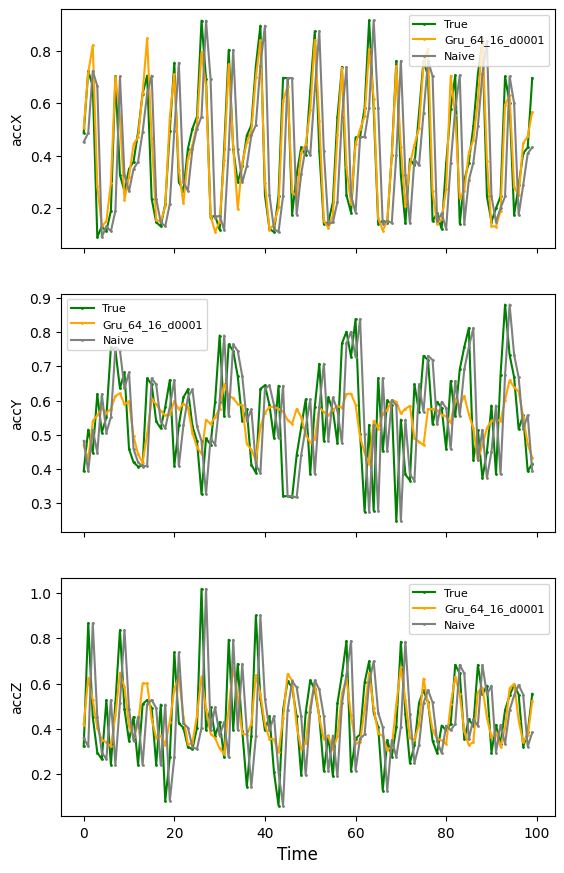

In [59]:
estimators['07_c75_hrm.csv'].draw(size=100, draw_horizon=1)

Show predictions with the worst quality.

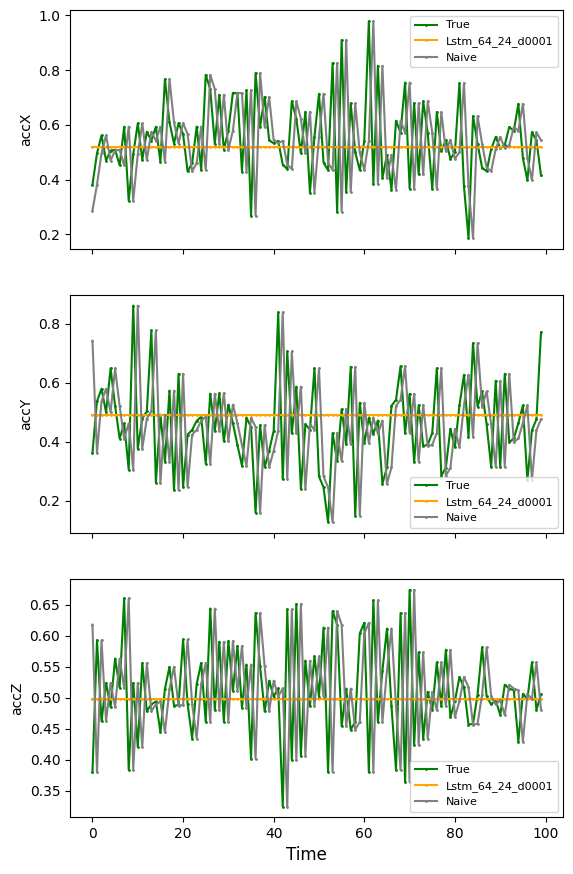

In [56]:
estimators['01_off_hrm.csv'].draw(size=100, draw_horizon=1)